In [414]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2, chi2_contingency
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
pd.set_option('display.max_column',None)
warnings.filterwarnings('ignore')
import re

In [415]:
df = pd.read_csv('bank-additional-full.csv')

In [416]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [417]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [418]:
## There are so many unknown values ...which we need to replace with NA

df = df.replace('unknown', np.nan)

In [419]:
## now Check for null values 
df.isnull().sum()/len(df) # % of missing values 

age               0.000000
job               0.008012
marital           0.001942
education         0.042027
default           0.208726
housing           0.024036
loan              0.024036
contact           0.000000
month             0.000000
day_of_week       0.000000
duration          0.000000
campaign          0.000000
pdays             0.000000
previous          0.000000
poutcome          0.000000
emp.var.rate      0.000000
cons.price.idx    0.000000
cons.conf.idx     0.000000
euribor3m         0.000000
nr.employed       0.000000
y                 0.000000
dtype: float64

In [420]:
df.dropna(inplace=True)

In [421]:
df.isnull().sum()/len(df) # % of missing values 

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

In [422]:
df.select_dtypes('object').columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

## y - has the client subscribed a term deposit?(Target)

In [423]:
df.y.value_counts()

no     26629
yes     3859
Name: y, dtype: int64

<AxesSubplot: xlabel='y', ylabel='count'>

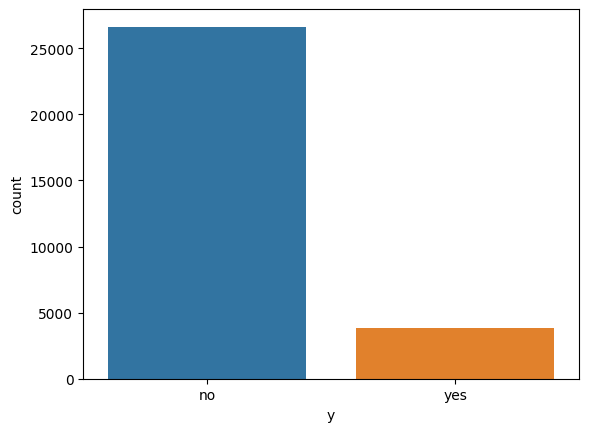

In [424]:
sns.countplot(data = df , x = 'y')

In [425]:
df['y'] = df['y'].astype('category').cat.codes

In [426]:
df['y'].value_counts()

0    26629
1     3859
Name: y, dtype: int64

## 1) Job

In [427]:
df.job.value_counts()

admin.           8737
blue-collar      5675
technician       5473
services         2857
management       2311
retired          1216
self-employed    1092
entrepreneur     1089
unemployed        738
housemaid         690
student           610
Name: job, dtype: int64

In [428]:
df['job'] = df['job'].astype('category').cat.codes

In [429]:
df.job.value_counts()

0     8737
1     5675
9     5473
7     2857
4     2311
5     1216
6     1092
2     1089
10     738
3      690
8      610
Name: job, dtype: int64

<AxesSubplot: xlabel='job', ylabel='count'>

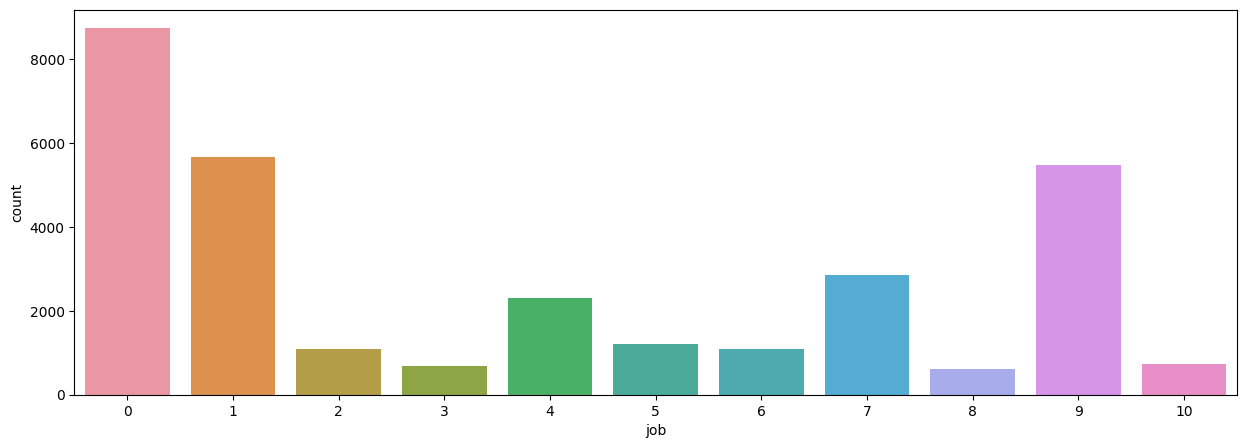

In [430]:
plt.figure(figsize=(15,5))
sns.countplot(data = df , x = 'job')

## 2) marital status

In [431]:
df.marital.value_counts()

married     17492
single       9443
divorced     3553
Name: marital, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'married'), Text(1, 0, 'single'), Text(2, 0, 'divorced')])

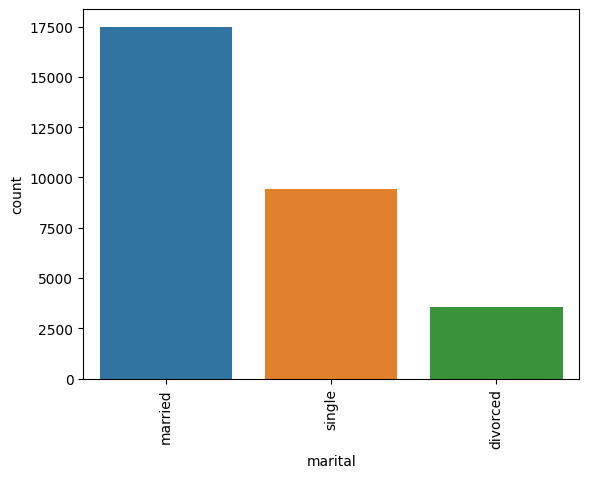

In [432]:
sns.countplot(data = df , x = 'marital')
plt.xticks(rotation = 90)

In [433]:
df['marital'] = df['marital'].map({'married':0 , 'single': 1 , 'divorced' : 2})

In [434]:
df.marital.value_counts()

0    17492
1     9443
2     3553
Name: marital, dtype: int64

## 3) education

In [435]:
df.education.value_counts()

university.degree      10412
high.school             7699
professional.course     4321
basic.9y                4276
basic.4y                2380
basic.6y                1389
illiterate                11
Name: education, dtype: int64

<AxesSubplot: xlabel='education', ylabel='count'>

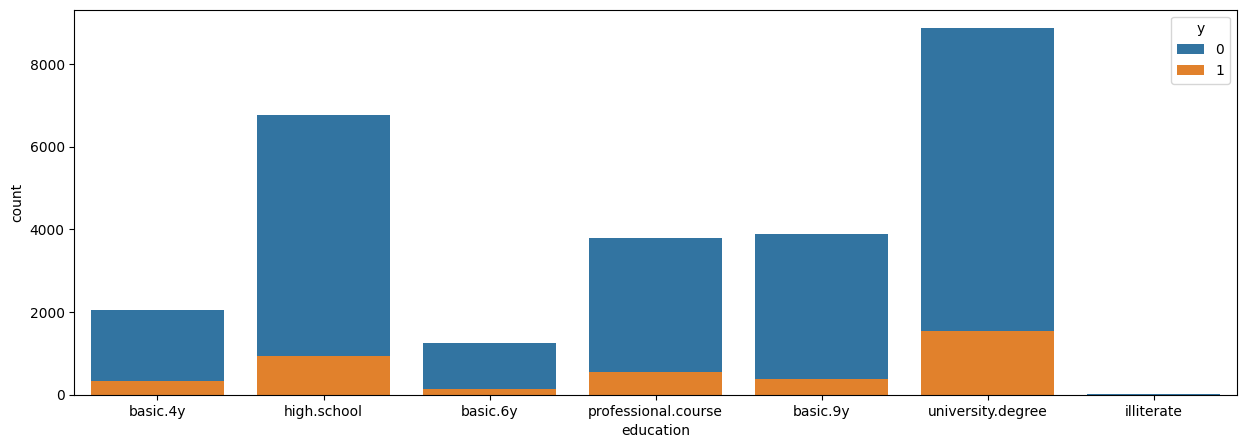

In [436]:
plt.figure(figsize=(15,5))
sns.countplot(data = df , x = 'education' ,hue='y' , dodge= False)

In [437]:
df['education'] = df['education'].map({'illiterate': 0 , 'basic.4y': 1 , 'basic.6y': 2 , 'basic.9y' : 3 , 'high.school': 4 , 'university.degree': 5 ,
                                      'professional.course': 6})

In [438]:
df.education.value_counts()

5    10412
4     7699
6     4321
3     4276
1     2380
2     1389
0       11
Name: education, dtype: int64

## 4) default

In [439]:
df.default.value_counts()

no     30485
yes        3
Name: default, dtype: int64

<AxesSubplot: xlabel='default', ylabel='count'>

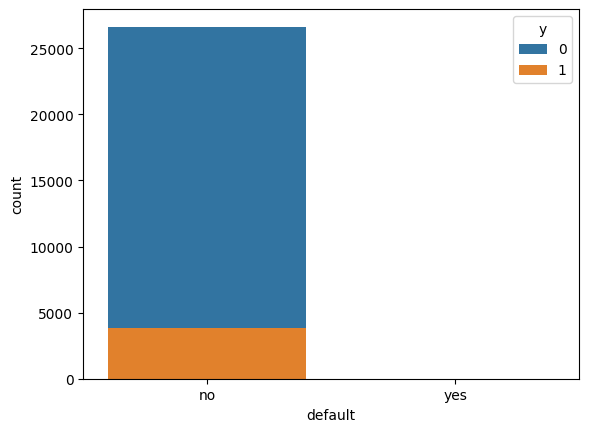

In [440]:
sns.countplot(data = df , x = 'default' ,hue='y' , dodge= False)

In [441]:
df['default'] = df['default'].astype('category').cat.codes

In [442]:
df.default.value_counts()

0    30485
1        3
Name: default, dtype: int64

## 5) housing

In [443]:
df.housing.value_counts()

yes    16521
no     13967
Name: housing, dtype: int64

<AxesSubplot: xlabel='housing', ylabel='count'>

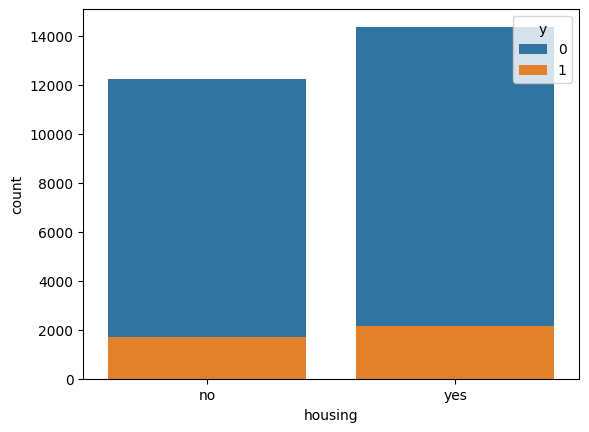

In [444]:
sns.countplot(data = df , x = 'housing' , hue='y' , dodge= False)

In [445]:
df['housing'] = df['housing'].astype('category').cat.codes

In [446]:
df.housing.value_counts()

1    16521
0    13967
Name: housing, dtype: int64

## 6) loan

In [447]:
df.loan.value_counts()

no     25720
yes     4768
Name: loan, dtype: int64

<AxesSubplot: xlabel='loan', ylabel='count'>

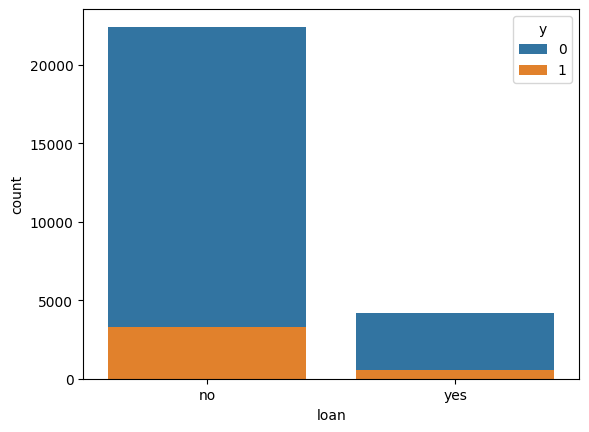

In [448]:
sns.countplot(data = df , x = 'loan' , hue='y' , dodge= False)

In [449]:
df['loan'] = df['loan'].astype('category').cat.codes

In [450]:
df.loan.value_counts()

0    25720
1     4768
Name: loan, dtype: int64

## 7) contact communication type

In [451]:
df.contact.value_counts()

cellular     20443
telephone    10045
Name: contact, dtype: int64

<AxesSubplot: xlabel='contact', ylabel='count'>

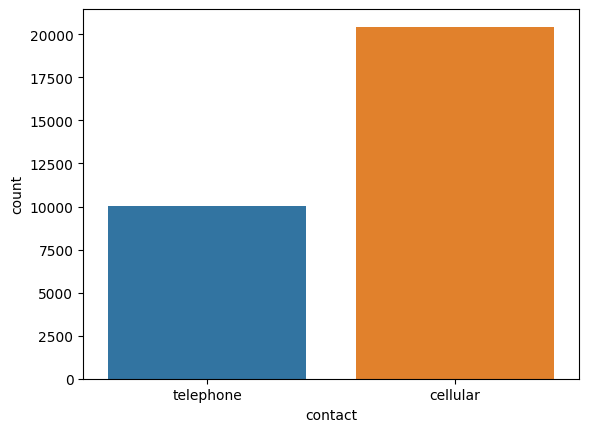

In [452]:
sns.countplot(data = df , x  = 'contact')

In [453]:
df['contact'] = df['contact'].astype('category').cat.codes

In [454]:
df.contact.value_counts()

0    20443
1    10045
Name: contact, dtype: int64

## 8) last contact (month) of year

In [455]:
df.month.value_counts()

may    9733
jul    5081
aug    4673
jun    3614
nov    3496
apr    2115
oct     642
sep     495
mar     482
dec     157
Name: month, dtype: int64

<AxesSubplot: xlabel='month', ylabel='count'>

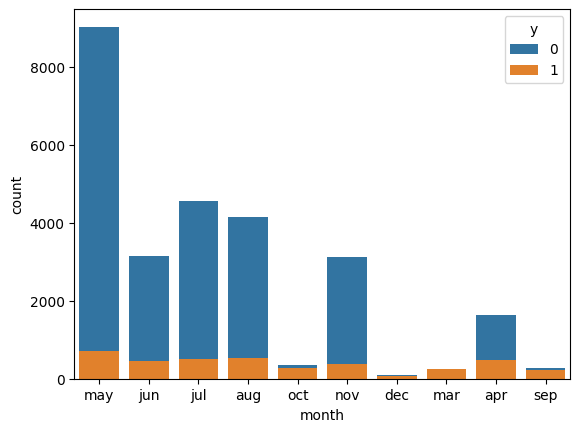

In [456]:
sns.countplot(data = df , x = 'month' , hue='y' , dodge= False)

In [457]:
df['month'] =  df['month'].map({'mar' : 3 ,'apr': 4 , 'may': 5 , 'jun': 6 , 'jul' : 7 , 'aug': 8 , 'sep' : 9 , 'oct' : 10 , 'nov': 11 , 'dec': 12})

In [458]:
df.month.value_counts()

5     9733
7     5081
8     4673
6     3614
11    3496
4     2115
10     642
9      495
3      482
12     157
Name: month, dtype: int64

## 9) day_of_week (last contact month of year)

In [459]:
df.day_of_week.value_counts()

thu    6395
mon    6279
wed    6125
tue    5955
fri    5734
Name: day_of_week, dtype: int64

<AxesSubplot: xlabel='day_of_week', ylabel='count'>

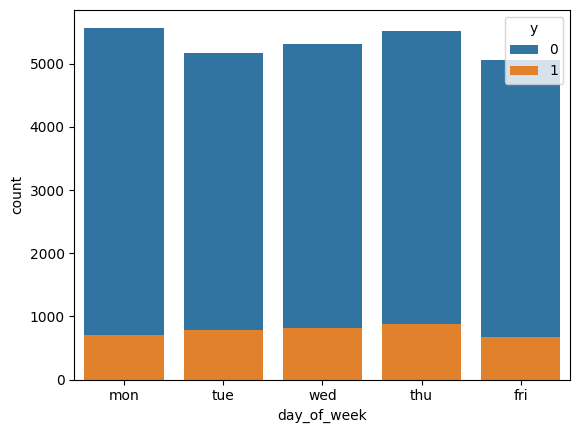

In [460]:
sns.countplot(data = df , x = 'day_of_week' ,hue='y' , dodge= False )

In [461]:
df['day_of_week'] = df['day_of_week'].map({'mon' : 1 , 'tue' : 2 , 'wed' : 3 , 'thu' : 4 , 'fri': 5})

In [462]:
df.day_of_week.value_counts()

4    6395
1    6279
3    6125
2    5955
5    5734
Name: day_of_week, dtype: int64

## 10 ) poutcome (outcome of the previous marketing campaign)

In [463]:
df.poutcome.value_counts()

nonexistent    25836
failure         3461
success         1191
Name: poutcome, dtype: int64

<AxesSubplot: xlabel='poutcome', ylabel='count'>

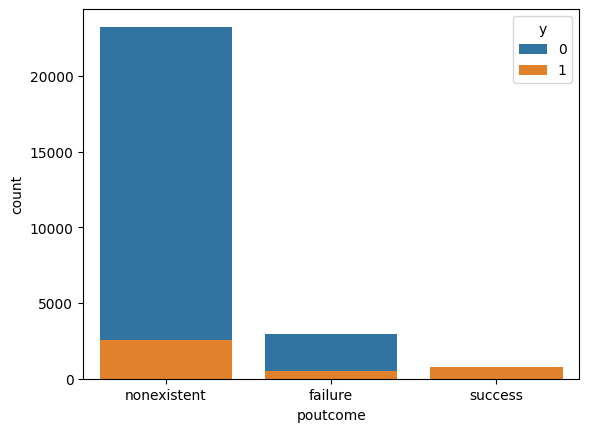

In [464]:
sns.countplot(data = df , x = 'poutcome' , hue='y' , dodge= False)

In [465]:
df['poutcome'] = df['poutcome'].astype('category').cat.codes

In [466]:
df.poutcome.value_counts() # 0 : failure , 1: noneexistence , 2:success

1    25836
0     3461
2     1191
Name: poutcome, dtype: int64

In [467]:
df.select_dtypes('number').columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

## Age 

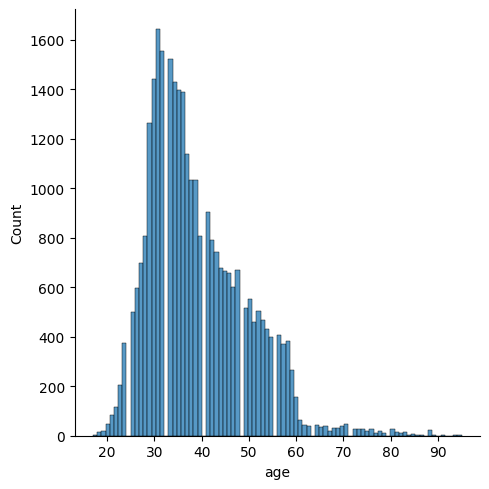

In [468]:
sns.displot(data = df , x = 'age')

<AxesSubplot: xlabel='age'>

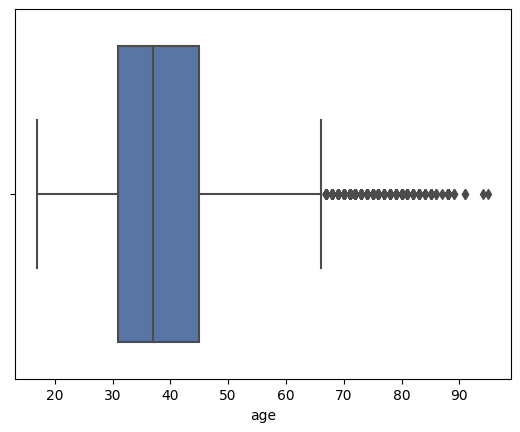

In [469]:
sns.boxplot(data = df , x = 'age' , palette='deep')

## duration

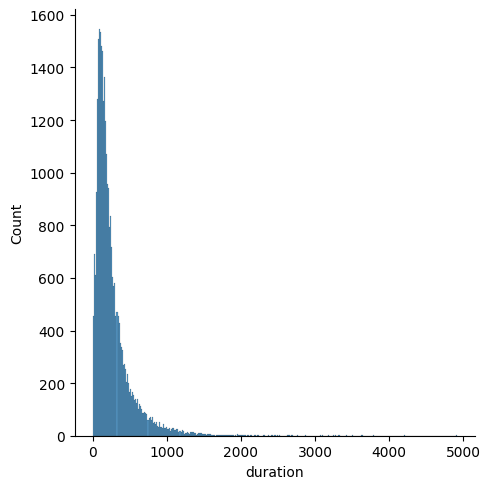

In [470]:
sns.displot(data = df , x = 'duration')

<AxesSubplot: xlabel='duration'>

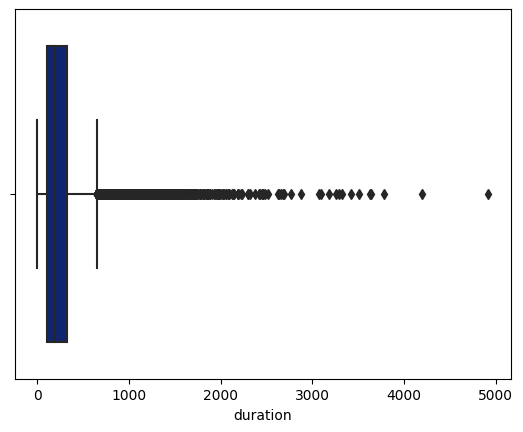

In [471]:
sns.boxplot(data = df , x = 'duration' , palette='dark')

## campaign

In [472]:
df.campaign.value_counts()

1     13246
2      7873
3      3905
4      1937
5      1156
6       696
7       440
8       283
9       195
10      164
11      124
12       89
13       54
14       48
17       41
16       30
15       30
18       23
20       21
19       18
21       14
23       14
22       11
24       11
29        8
27        7
30        7
25        6
28        6
26        5
31        5
32        4
35        4
33        3
42        2
40        2
34        2
39        1
41        1
37        1
43        1
Name: campaign, dtype: int64

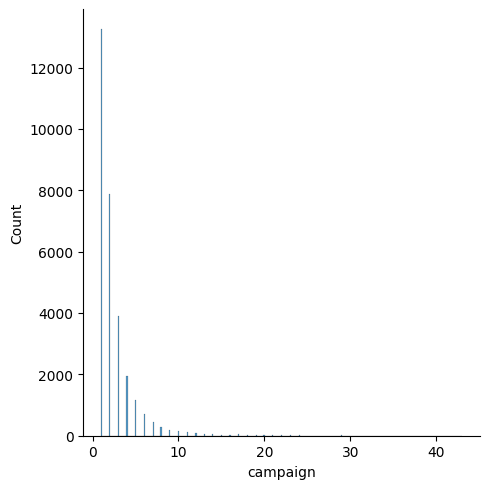

In [473]:
sns.displot(data = df , x = 'campaign')

<AxesSubplot: xlabel='campaign'>

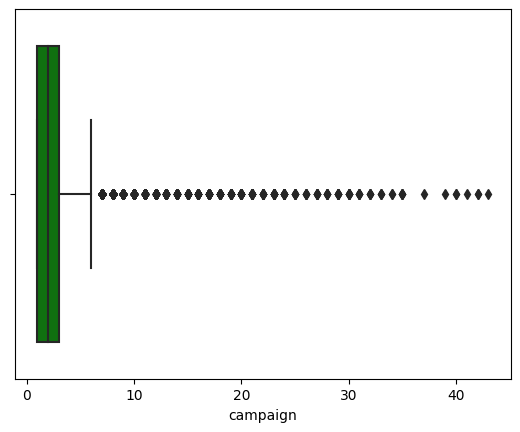

In [474]:
sns.boxplot(data = df , x = 'campaign' , color='g')

## pdays

In [475]:
df.pdays.value_counts()

999    29178
3        381
6        363
4        102
2         53
9         53
7         50
12        50
5         43
10        40
13        33
11        25
15        22
1         21
14        17
0         14
8         13
16         8
17         6
18         5
22         3
19         3
21         2
25         1
26         1
27         1
Name: pdays, dtype: int64

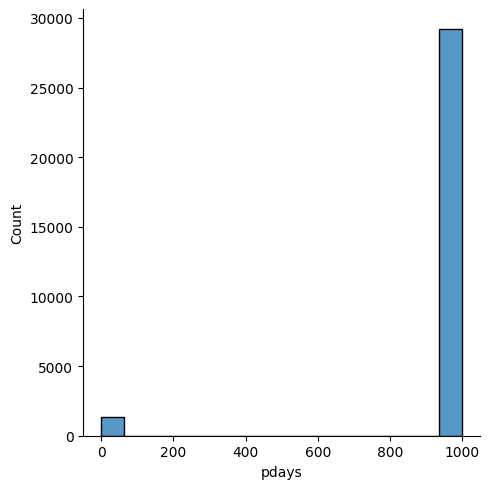

In [476]:
sns.displot(data = df , x = 'pdays')

<AxesSubplot: xlabel='pdays'>

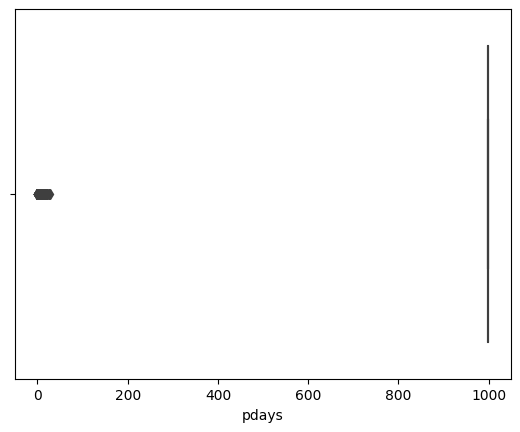

In [477]:
sns.boxplot(data = df , x = 'pdays')

## previous(number of contacts performed before this campaign and for this client)

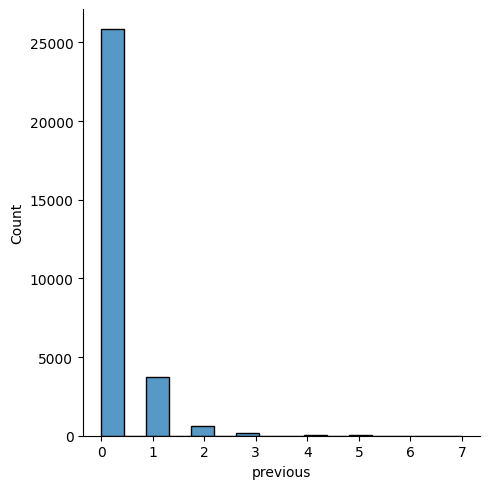

In [478]:
sns.displot(data = df , x = 'previous')

## employment variation rate - quarterly indicator

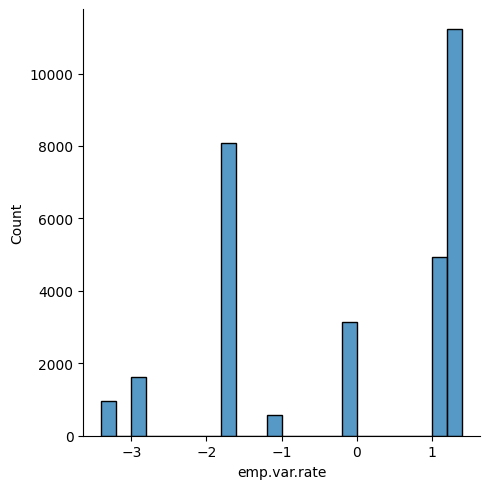

In [479]:
sns.displot(data = df , x = 'emp.var.rate')

<AxesSubplot: xlabel='emp.var.rate'>

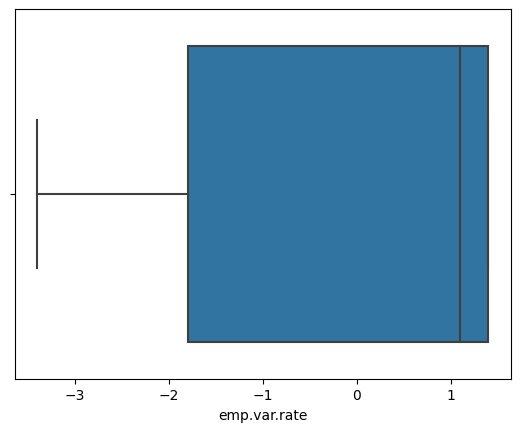

In [480]:
sns.boxplot(data = df , x = 'emp.var.rate')

## consumer price index - monthly indicator

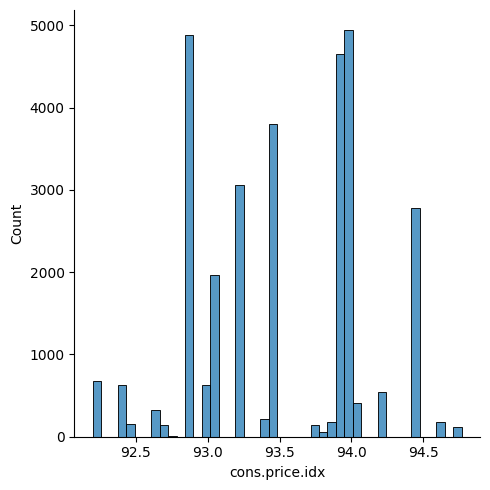

In [481]:
sns.displot(data = df , x = 'cons.price.idx')

<AxesSubplot: xlabel='cons.price.idx'>

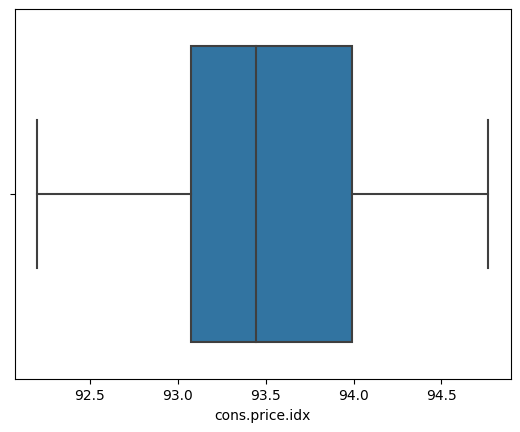

In [482]:
sns.boxplot(data = df , x = 'cons.price.idx')

## consumer confidence index - monthly indicator

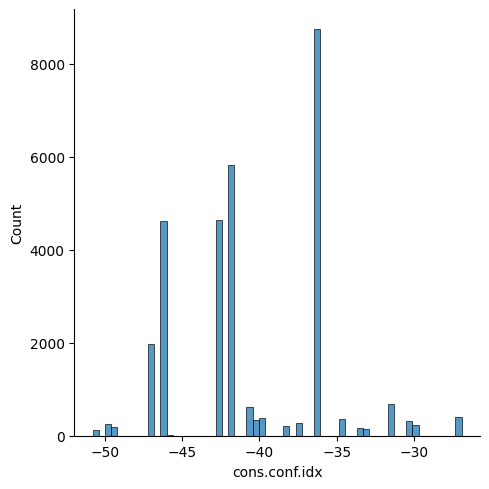

In [483]:
sns.displot(data = df , x = 'cons.conf.idx')

<AxesSubplot: xlabel='cons.conf.idx'>

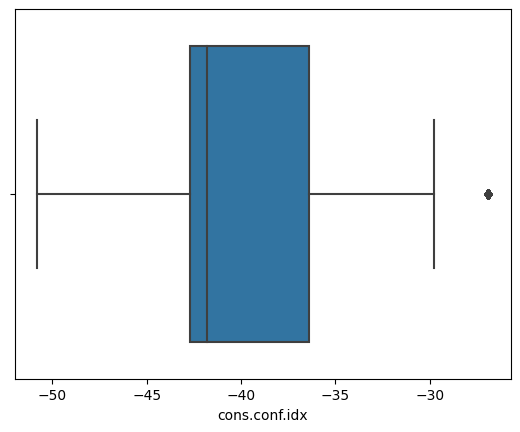

In [484]:
sns.boxplot(data = df , x = 'cons.conf.idx')

## euribor 3 month rate - daily indicator

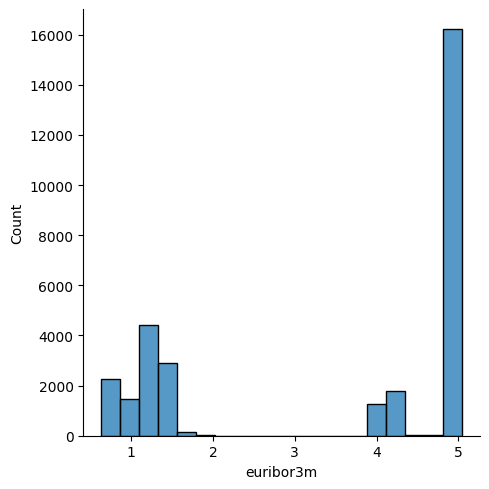

In [485]:
sns.displot(data = df , x = 'euribor3m')

<AxesSubplot: xlabel='euribor3m'>

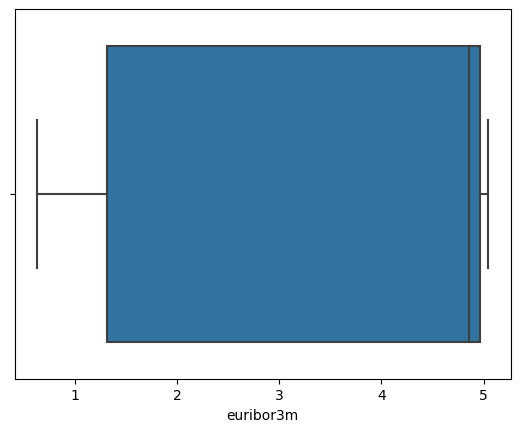

In [486]:
sns.boxplot(data = df , x ='euribor3m')

## number of employees - quarterly indicator

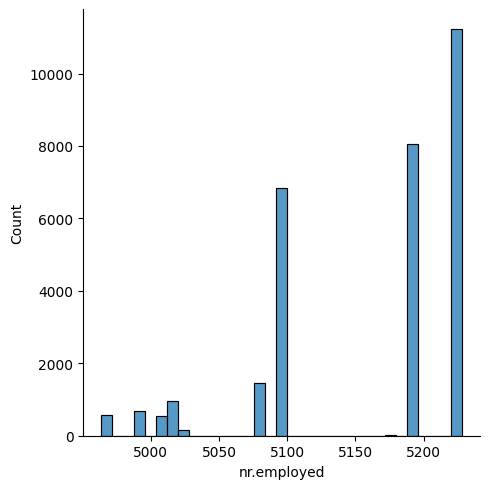

In [487]:
sns.displot(data = df , x = 'nr.employed')

<AxesSubplot: xlabel='nr.employed'>

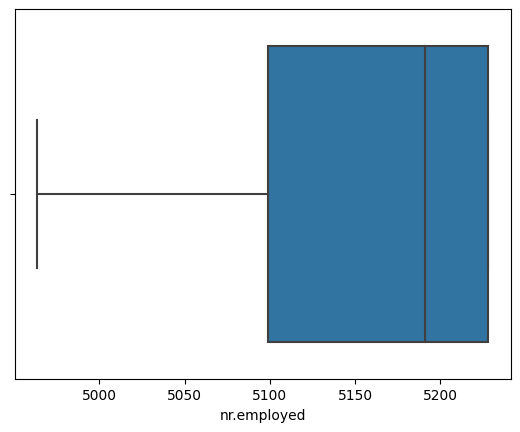

In [488]:
sns.boxplot(data = df , x = 'nr.employed')

## Model (SVM)

In [489]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [490]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  int8   
 2   marital         30488 non-null  int64  
 3   education       30488 non-null  int64  
 4   default         30488 non-null  int8   
 5   housing         30488 non-null  int8   
 6   loan            30488 non-null  int8   
 7   contact         30488 non-null  int8   
 8   month           30488 non-null  int64  
 9   day_of_week     30488 non-null  int64  
 10  duration        30488 non-null  int64  
 11  campaign        30488 non-null  int64  
 12  pdays           30488 non-null  int64  
 13  previous        30488 non-null  int64  
 14  poutcome        30488 non-null  int8   
 15  emp.var.rate    30488 non-null  float64
 16  cons.price.idx  30488 non-null  float64
 17  cons.conf.idx   30488 non-null 

In [491]:
X = df.iloc[:,:20]
y = df.iloc[:,-1]

In [492]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
X = Scaler.fit_transform(X)

In [493]:
y

0        0
2        0
3        0
4        0
6        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 30488, dtype: int8

In [494]:
from sklearn.model_selection import train_test_split
from sklearn import svm
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix

In [495]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)
from sklearn.svm import SVC

## SVM - kernel = linear

In [496]:
#SVC - Suppot Vector Classifier
svc =svm.SVC(class_weight='balanced', kernel='linear') 
td_svc = svc.fit(X_train, y_train)


In [497]:
td_svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': 'balanced',
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [498]:
#Prediction
y_pred_test_lin = td_svc.predict(X_test)
print(len(y_pred_lin))
print(y_pred_lin)


6098
[0 0 1 ... 1 0 0]


In [501]:
y_pred_train_lin = td_svc.predict(X_train)

In [502]:
#Confusion Matrix & Report
pd.crosstab(y_test,y_pred_lin, margins=True,rownames=['Actual'], colnames=['Predict'])

Predict,0,1,All
Actual,,,
0,4406,921,5327
1,87,684,771
All,4493,1605,6098


In [503]:
#Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_SVM_test_lin = accuracy_score(y_test,y_pred_test_lin) #0.874

In [504]:
accuracy_SVM_train_lin = accuracy_score(y_train,y_pred_train_lin)

In [505]:
#finding fpr, tpr & thresholds
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_lin)


In [506]:
#AUC -Area Under Curve
td_roc_auc = auc(fpr,tpr)
print(td_roc_auc) #0.810

0.8455028186438323


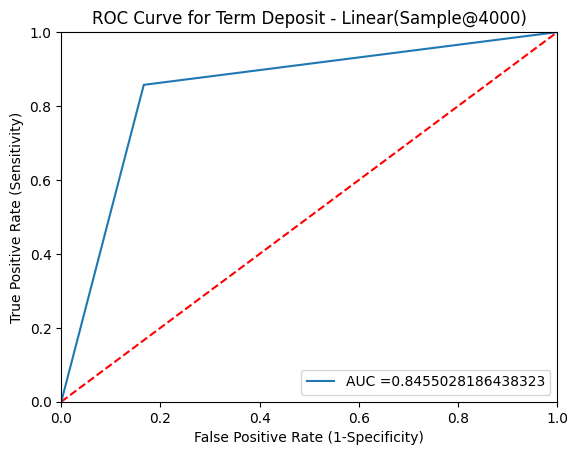

In [507]:
#ROC Curve
plt.title('ROC Curve for Term Deposit - Linear(Sample@4000)')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC =' +str(td_roc_auc))
plt.legend(loc=4)
plt.show()


In [508]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test_lin))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      5327
           1       0.43      0.86      0.57       771

    accuracy                           0.84      6098
   macro avg       0.70      0.85      0.73      6098
weighted avg       0.91      0.84      0.86      6098



In [562]:
tp_Ll = confusion_matrix(y_test, y_pred_test_lin)[0,0]
fp_Ll = confusion_matrix(y_test, y_pred_test_lin)[0,1]
tn_Ll = confusion_matrix(y_test, y_pred_test_lin)[1,1]
fn_Ll = confusion_matrix(y_test, y_pred_test_lin)[1,0]

## SVM - kernel = 'rbf'

In [510]:
#SVC - Suppot Vector Classifier
svc =svm.SVC(class_weight='balanced', probability=True) # rbf is default
td_svc = svc.fit(X_train, y_train)
td_svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': 'balanced',
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [511]:
#Prediction
yp1_pred_rbf = td_svc.predict_proba(X_test)[:,1]
len(yp1_pred_rbf)
print(yp1_pred_rbf)

[0.0526306  0.00463584 0.1544943  ... 0.76667912 0.03666584 0.01257353]


In [512]:
#Prediction
y_pred_test_rbf = td_svc.predict(X_test)
#len(y_pred_rbf)
print(y_pred_test_rbf)

[0 0 1 ... 1 0 0]


In [514]:
y_pred_train_rbf = td_svc.predict(X_train)

In [515]:
#Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_SVM_test_rbf = accuracy_score(y_test,y_pred_test_rbf) #0.874

In [516]:
accuracy_SVM_train_rbf = accuracy_score(y_train,y_pred_train_rbf)

In [517]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred_test_rbf))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      5327
           1       0.43      0.89      0.58       771

    accuracy                           0.83      6098
   macro avg       0.70      0.86      0.74      6098
weighted avg       0.91      0.83      0.86      6098



In [518]:
tp_rbf = confusion_matrix(y_test, y_pred_test_rbf)[0,0]
fp_rbf = confusion_matrix(y_test, y_pred_test_rbf)[0,1]
tn_rbf = confusion_matrix(y_test, y_pred_test_rbf)[1,1]
fn_rbf = confusion_matrix(y_test, y_pred_test_rbf)[1,0]

In [519]:
#finding fpr, tpr & thresholds
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test , y_pred_test_rbf)

In [520]:
#AUC -Area Under Curve
td_roc_auc = auc(fpr,tpr)
print(td_roc_auc) 

0.8571333614309016


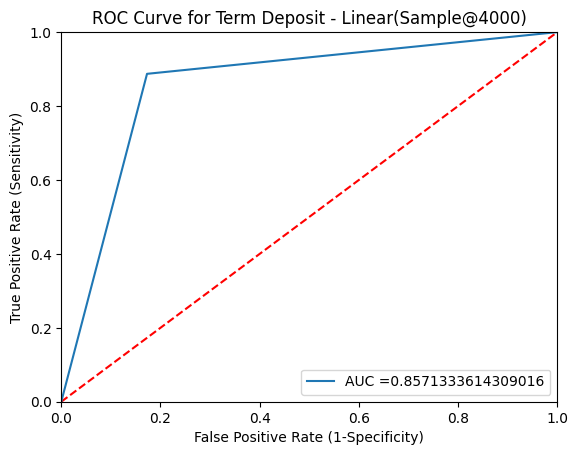

In [521]:
#ROC Curve
plt.title('ROC Curve for Term Deposit - Linear(Sample@4000)')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC =' +str(td_roc_auc))
plt.legend(loc=4)
plt.show()

## SVM - kernel = 'poly'

In [522]:
#SVC - Suppot Vector Classifier
svc =svm.SVC(class_weight='balanced', kernel='poly') 
td_svc = svc.fit(X_train , y_train)
td_svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': 'balanced',
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [523]:
y_pred_test_poly = td_svc.predict(X_test)

In [526]:
print(y_test.shape)
y_pred_test_poly.shape

(6098,)


(6098,)

In [527]:
y_pred_train_poly = td_svc.predict(X_train)

In [528]:
#Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_SVM_test_poly = accuracy_score(y_test,y_pred_test_poly) #0.874

In [529]:
accuracy_SVM_train_poly = accuracy_score(y_train,y_pred_train_poly)

In [530]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred_test_poly))

              precision    recall  f1-score   support

           0       0.98      0.82      0.90      5327
           1       0.42      0.90      0.58       771

    accuracy                           0.83      6098
   macro avg       0.70      0.86      0.74      6098
weighted avg       0.91      0.83      0.86      6098



In [564]:
tp_poly = confusion_matrix(y_test, y_pred_test_poly)[0,0]
fp_poly = confusion_matrix(y_test, y_pred_test_poly)[0,1]
tn_poly = confusion_matrix(y_test, y_pred_test_poly)[1,1]
fn_poly = confusion_matrix(y_test, y_pred_test_poly)[1,0]

In [532]:
#finding fpr, tpr & thresholds
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_poly)

In [533]:
#AUC -Area Under Curve
td_roc_auc = auc(fpr,tpr)
print(td_roc_auc) 

0.86128043101767


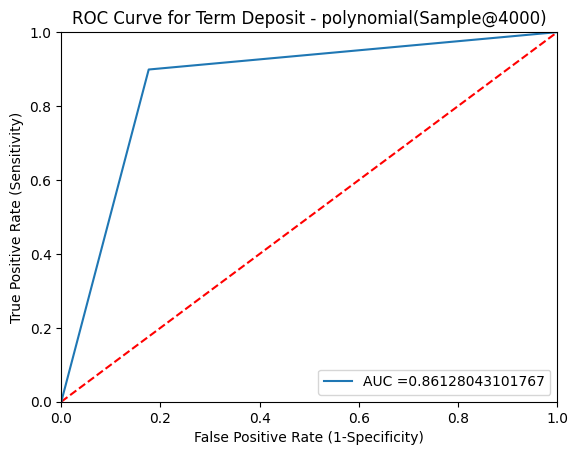

In [534]:
#ROC Curve
plt.title('ROC Curve for Term Deposit - polynomial(Sample@4000)')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC =' +str(td_roc_auc))
plt.legend(loc=4)
plt.show()

# Model 2 - Decision Tree

In [535]:
# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'gini', max_features=6, max_leaf_nodes=400, random_state = 33)
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_features=6, max_leaf_nodes=400, random_state=33)

In [536]:
# Predicting Cross Validation Score
from sklearn.model_selection import cross_val_score

cv_dt = cross_val_score(estimator = classifier_dt, X = X_train, y = y_train, cv = 10)
print("CV: ", cv_dt.mean())

y_pred_dt_train = classifier_dt.predict(X_train) 
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
print("Training set: ", accuracy_dt_train)

y_pred_dt_test = classifier_dt.predict(X_test)
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
print("Test set: ", accuracy_dt_test)

CV:  0.8993849938499384
Training set:  0.9332513325133251
Test set:  0.8947195801902263


In [537]:
confusion_matrix(y_test, y_pred_dt_test)

array([[5059,  268],
       [ 374,  397]], dtype=int64)

In [538]:
from sklearn.metrics import classification_report

print(classification_report(y_test , y_pred_dt_test))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5327
           1       0.60      0.51      0.55       771

    accuracy                           0.89      6098
   macro avg       0.76      0.73      0.75      6098
weighted avg       0.89      0.89      0.89      6098



In [539]:
tp_dt = confusion_matrix(y_test, y_pred_dt_test)[0,0]
fp_dt = confusion_matrix(y_test, y_pred_dt_test)[0,1]
tn_dt = confusion_matrix(y_test, y_pred_dt_test)[1,1]
fn_dt = confusion_matrix(y_test, y_pred_dt_test)[1,0]

## Model - 3 Random Forest Classification

In [540]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(criterion = 'entropy', max_features = 4, n_estimators = 400, random_state=33)
classifier_rf.fit(X_train , y_train)

RandomForestClassifier(criterion='entropy', max_features=4, n_estimators=400,
                       random_state=33)

In [541]:
# Predicting Cross Validation Score
cv_rf = cross_val_score(estimator = classifier_rf, X = X_train , y = y_train , cv = 10)
print("CV: ", cv_rf.mean())

y_pred_rf_train = classifier_rf.predict(X_train)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
print("Training set: ", accuracy_rf_train)

y_pred_rf_test = classifier_rf.predict(X_test)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
print("Test set: ", accuracy_rf_test)

CV:  0.9062730627306272
Training set:  1.0
Test set:  0.9025910134470319


In [542]:
confusion_matrix(y_test, y_pred_rf_test)

array([[5105,  222],
       [ 372,  399]], dtype=int64)

In [543]:
from sklearn.metrics import classification_report

print(classification_report(y_test , y_pred_rf_test))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      5327
           1       0.64      0.52      0.57       771

    accuracy                           0.90      6098
   macro avg       0.79      0.74      0.76      6098
weighted avg       0.90      0.90      0.90      6098



In [544]:
tp_rf = confusion_matrix(y_test, y_pred_rf_test)[0,0]
fp_rf = confusion_matrix(y_test, y_pred_rf_test)[0,1]
tn_rf = confusion_matrix(y_test, y_pred_rf_test)[1,1]
fn_rf = confusion_matrix(y_test, y_pred_rf_test)[1,0]

## Model - 4 (Naive Bayse)

In [545]:
# Fitting classifier to the Training set
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

GaussianNB()

In [546]:
# Predicting Cross Validation Score
cv_nb = cross_val_score(estimator = classifier_nb, X = X_train, y = y_train, cv = 10)
print("CV: ", cv_nb.mean())

y_pred_nb_train = classifier_nb.predict(X_train)
accuracy_nb_train = accuracy_score(y_train, y_pred_nb_train)
print("Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(X_test)
accuracy_nb_test = accuracy_score(y_test, y_pred_nb_test)
print("Test set: ", accuracy_nb_test)

CV:  0.656580565805658
Training set:  0.6580565805658056
Test set:  0.6602164644145622


In [547]:
confusion_matrix(y_test, y_pred_nb_test)

array([[3342, 1985],
       [  87,  684]], dtype=int64)

In [548]:
from sklearn.metrics import classification_report

print(classification_report(y_test , y_pred_nb_test))

              precision    recall  f1-score   support

           0       0.97      0.63      0.76      5327
           1       0.26      0.89      0.40       771

    accuracy                           0.66      6098
   macro avg       0.62      0.76      0.58      6098
weighted avg       0.88      0.66      0.72      6098



In [549]:
tp_nb = confusion_matrix(y_test, y_pred_nb_test)[0,0]
fp_nb = confusion_matrix(y_test, y_pred_nb_test)[0,1]
tn_nb = confusion_matrix(y_test, y_pred_nb_test)[1,1]
fn_nb = confusion_matrix(y_test, y_pred_nb_test)[1,0]

## Model - 5 K-Nearest Neighbors (K-NN)

In [550]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(leaf_size = 1, metric = 'minkowski', n_neighbors = 32, weights = 'distance')
classifier_knn.fit(X_train , y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=32, weights='distance')

In [551]:
y_train.shape

(24390,)

In [552]:
# Predicting Cross Validation Score
cv_knn = cross_val_score(estimator = classifier_knn, X = X_train , y = y_train, cv = 10)
print("CV: ", cv_knn.mean())

y_pred_knn_train = classifier_knn.predict(X_train)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Training set: ", accuracy_knn_train)

y_pred_knn_test = classifier_knn.predict(X_test)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Test set: ", accuracy_knn_test)

CV:  0.8863878638786387
Training set:  1.0
Test set:  0.8888160052476222


In [553]:
confusion_matrix(y_test, y_pred_knn_test)

array([[5233,   94],
       [ 584,  187]], dtype=int64)

In [554]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      5327
           1       0.67      0.24      0.36       771

    accuracy                           0.89      6098
   macro avg       0.78      0.61      0.65      6098
weighted avg       0.87      0.89      0.87      6098



In [555]:
tp_knn = confusion_matrix(y_test, y_pred_knn_test)[0,0]
fp_knn = confusion_matrix(y_test, y_pred_knn_test)[0,1]
tn_knn = confusion_matrix(y_test, y_pred_knn_test)[1,1]
fn_knn = confusion_matrix(y_test, y_pred_knn_test)[1,0]

## Model - 6 Logistic Regression

In [556]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(C=1, fit_intercept=True, max_iter=1000, penalty = 'l2', solver='liblinear')
classifier_lr.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=1000, solver='liblinear')

In [557]:
# Predicting Cross Validation Score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

cv_lr = cross_val_score(estimator = classifier_lr, X = X_train , y = y_train , cv = 10)
print("CV: ", cv_lr.mean())

y_pred_lr_train = classifier_lr.predict(X_train)
accuracy_lr_train = accuracy_score(y_train, y_pred_lr_train)
print("Training set: ", accuracy_lr_train)

y_pred_lr_test = classifier_lr.predict(X_test)
accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)
print("Test set: ", accuracy_lr_test)

CV:  0.8989339893398933
Training set:  0.8992209922099221
Test set:  0.89996720236143


In [558]:
confusion_matrix(y_test, y_pred_lr_test)

array([[5195,  132],
       [ 478,  293]], dtype=int64)

In [559]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred_lr_test))

              precision    recall  f1-score   support

           0       0.92      0.98      0.94      5327
           1       0.69      0.38      0.49       771

    accuracy                           0.90      6098
   macro avg       0.80      0.68      0.72      6098
weighted avg       0.89      0.90      0.89      6098



In [560]:
tp_lr = confusion_matrix(y_test, y_pred_lr_test)[0,0]
fp_lr = confusion_matrix(y_test, y_pred_lr_test)[0,1]
tn_lr = confusion_matrix(y_test, y_pred_lr_test)[1,1]
fn_lr = confusion_matrix(y_test, y_pred_lr_test)[1,0]

## Summary Model

In [565]:
models = [('Logistic Regression', tp_lr, fp_lr, tn_lr, fn_lr, accuracy_lr_train, accuracy_lr_test),
          ('K-Nearest Neighbors (KNN)', tp_knn, fp_knn, tn_knn, fn_knn, accuracy_knn_train, accuracy_knn_test),
          ('SVM (Linear)', tp_Ll, fp_Ll, tn_Ll, fn_Ll, accuracy_SVM_train_lin, accuracy_SVM_test_lin),
          ('SVM (rbf)', tp_rbf, fp_rbf , tn_rbf, fn_rbf, accuracy_SVM_train_rbf, accuracy_SVM_test_rbf),
          ('SVM (poly)' , tp_poly , fp_poly , tn_poly , fn_poly , accuracy_SVM_train_poly , accuracy_SVM_test_poly),
          ('Naive Bayes', tp_nb, fp_nb, tn_nb, fn_nb, accuracy_nb_train, accuracy_nb_test),
          ('Decision Tree Classification', tp_dt, fp_dt, tn_dt, fn_dt, accuracy_dt_train, accuracy_dt_test),
          ('Random Forest Tree Classification', tp_rf, fp_rf, tn_rf, fn_rf, accuracy_rf_train, accuracy_rf_test)
         ]

In [566]:
predict = pd.DataFrame(data = models, columns=['Model', 'True Positive', 'False Positive', 'True Negative',
                                               'False Negative', 'Accuracy(training)', 'Accuracy(test)',
                                               ])
predict

,Model,True Positive,False Positive,True Negative,False Negative,Accuracy(training),Accuracy(test)
0,Logistic Regression,5195,132,293,478,0.899221,0.899967
1,K-Nearest Neighbors (KNN),5233,94,187,584,1.000000,0.888816
2,SVM (Linear),4441,886,661,110,0.844977,0.836668
3,SVM (rbf),4406,921,684,87,0.846330,0.834700
4,SVM (poly),4388,939,693,78,0.844772,0.833224
5,Naive Bayes,3342,1985,684,87,0.658057,0.660216
6,Decision Tree Classification,5059,268,397,374,0.933251,0.894720
7,Random Forest Tree Classification,5105,222,399,372,1.000000,0.902591


## Visualizing Models Performance ¶


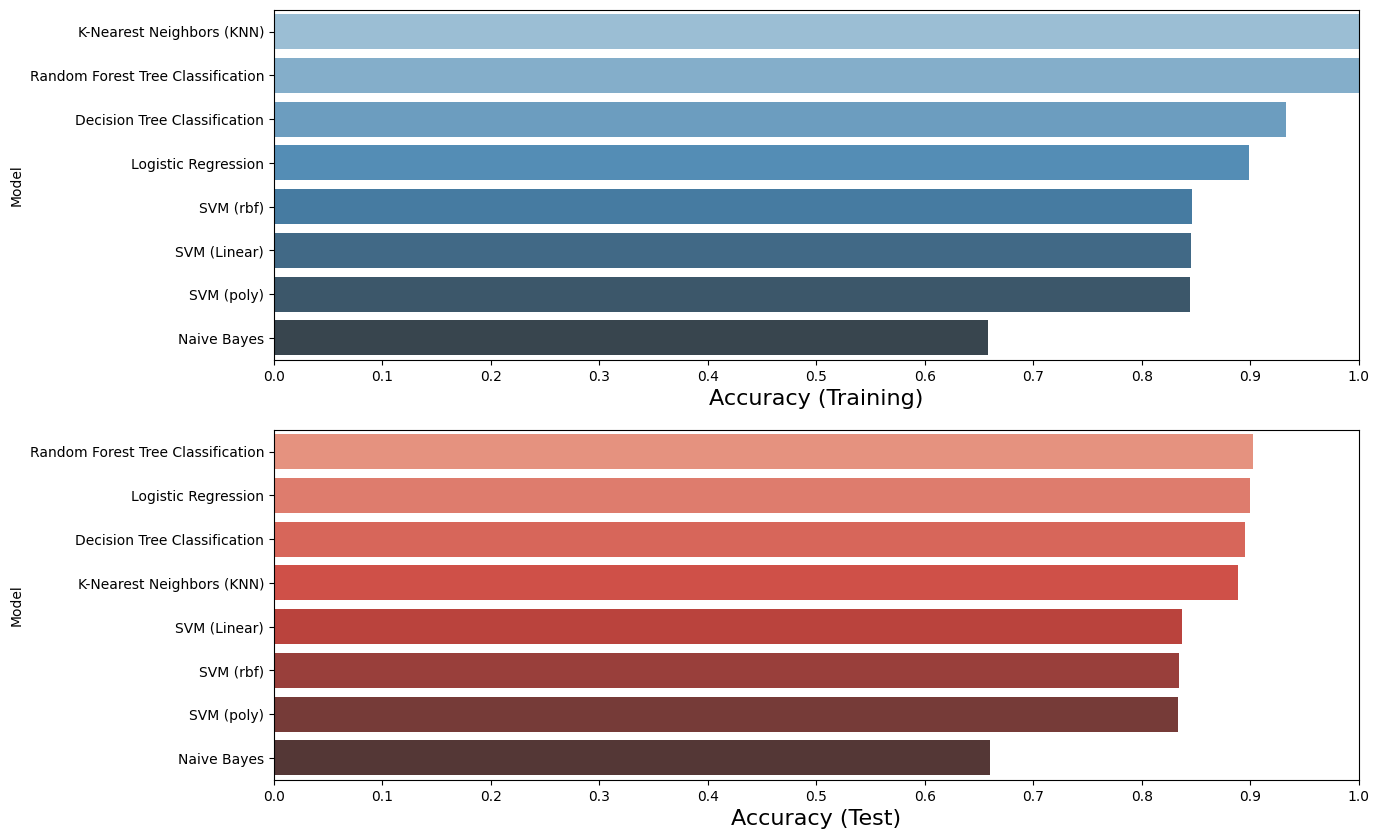

In [567]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Accuracy(training)'], ascending=False, inplace=True)

sns.barplot(x='Accuracy(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Accuracy (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Accuracy(test)'], ascending=False, inplace=True)

sns.barplot(x='Accuracy(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Accuracy (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

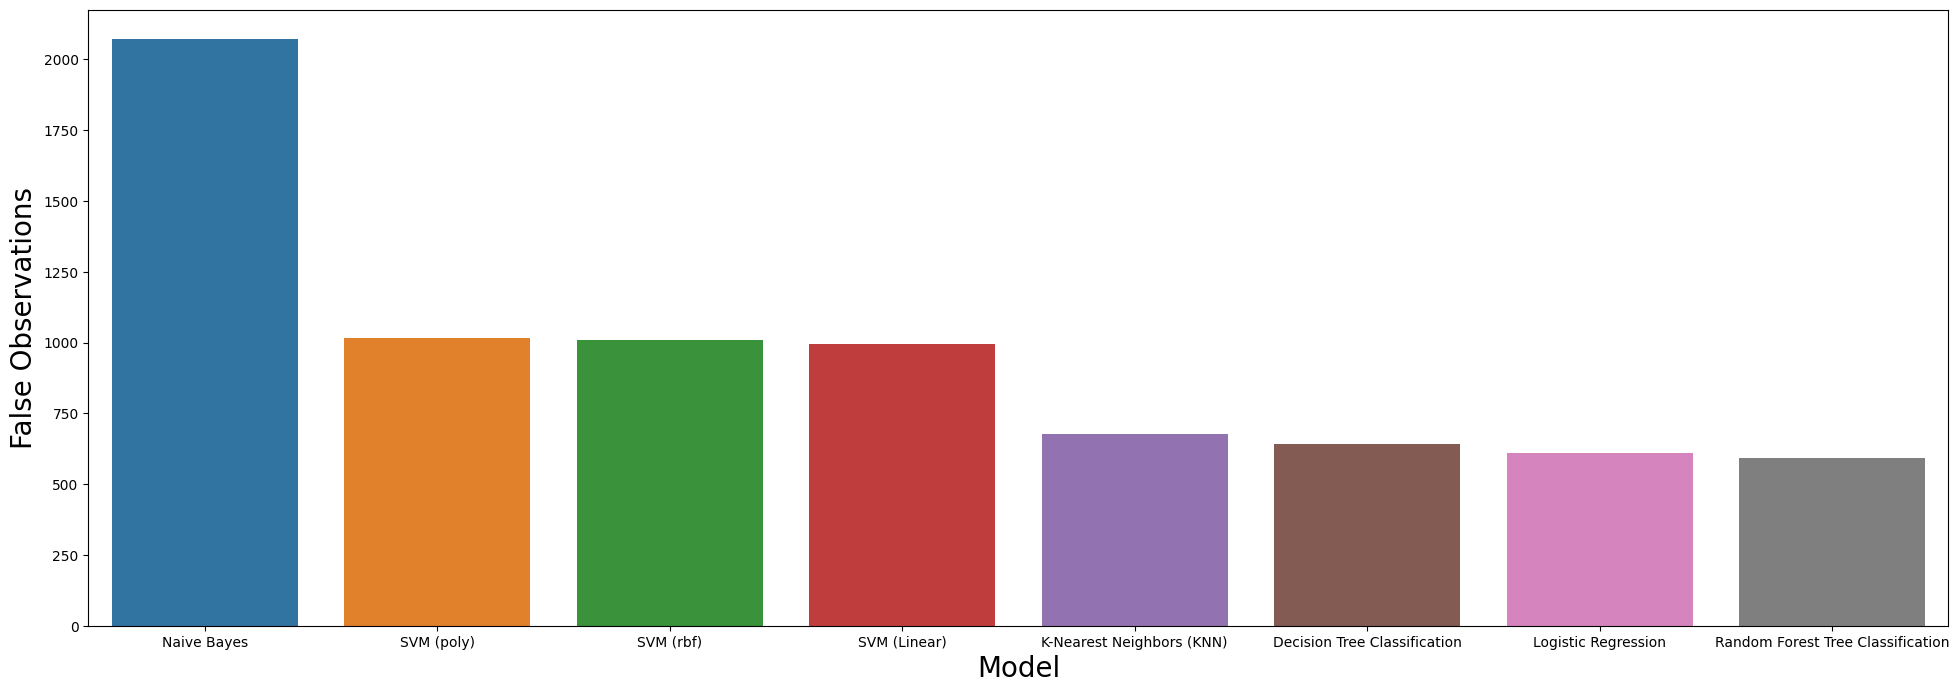

In [568]:
predict.sort_values(by=(['Accuracy(test)']), ascending=True, inplace=True)

f, axe = plt.subplots(1,1, figsize=(24,8))
sns.barplot(x = predict['Model'], y=predict['False Positive'] + predict['False Negative'], ax = axe)
axe.set_xlabel('Model', size=20)
axe.set_ylabel('False Observations', size=20)

plt.show()